Data Awal:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80       

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011 (11.76 KB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 0 (0.00 B)


Melatih Model...
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3147 - loss: 1.1962 - val_accuracy: 0.7500 - val_loss: 0.8721
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7287 - loss: 0.8293 - val_accuracy: 0.8333 - val_loss: 0.7131
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8701 - loss: 0.6157 - val_accuracy: 0.8333 - val_loss: 0.6074
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8733 - loss: 0.5564 - val_accuracy: 0.8333 - val_loss: 0.5484
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8858 - loss: 0.4483 - val_accuracy: 0.8500 - val_loss: 0.5262
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9013 - loss: 0.4340 - val_accuracy: 0.8667 - val_loss: 0.5169
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8777 - loss: 0.3933 - val_accuracy: 0.8833 - val_loss: 0.5170
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8934 - loss: 0.3365 - val_accuracy:

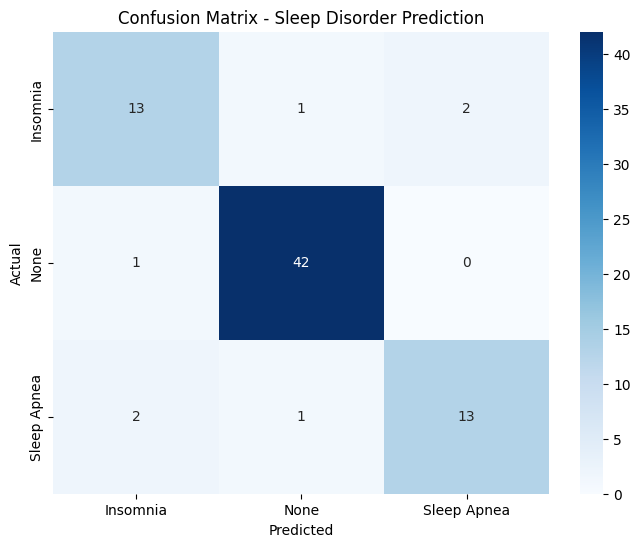

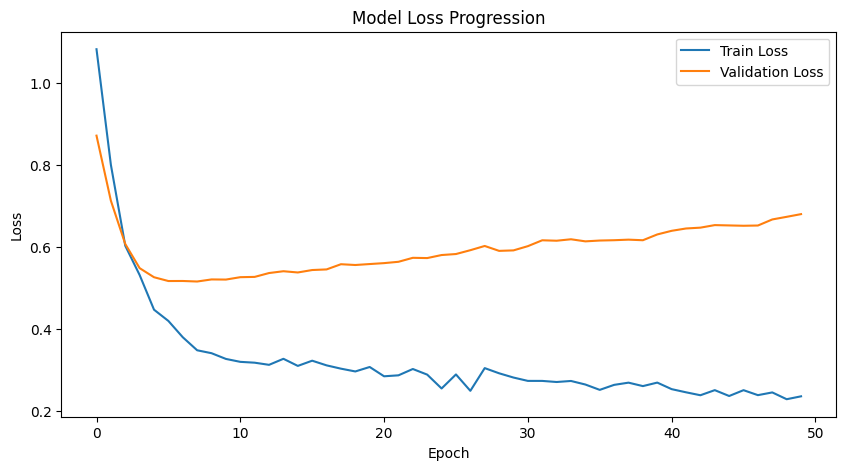

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. LOAD DATASET

# Pastikan file 'Sleep_health_and_lifestyle_dataset.csv' sudah diupload ke Colab
file_path = '/content/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

print("Data Awal:")
print(df.head())

# 2. DATA PREPROCESSING

# A. Handling Missing Values
# Kolom 'Sleep Disorder' yang kosong diasumsikan sebagai 'None' (Sehat)
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# B. Feature Engineering: Split Blood Pressure
if df['Blood Pressure'].dtype == 'object':
    df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
    df = df.drop('Blood Pressure', axis=1)

# C. Encoding Categorical Data
label_encoders = {}
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encoding Target (Sleep Disorder)
le_target = LabelEncoder()
df['Sleep Disorder'] = le_target.fit_transform(df['Sleep Disorder'])
target_classes = le_target.classes_
print(f"\nKelas Target: {target_classes}")

# Convert target to One-Hot Encoding for Neural Network
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = to_categorical(df['Sleep Disorder'])

# D. Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# E. Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. SEQUENCE MODELING (NEURAL NETWORK)
model = Sequential()

# Input Layer & Hidden Layer 1
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Dropout untuk mencegah overfitting
model.add(Dropout(0.3))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))

# Output Layer (3 neuron untuk 3 kelas: None, Insomnia, Sleep Apnea)
model.add(Dense(y.shape[1], activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary Model
model.summary()

# 4. TRAINING
print("\nMelatih Model...")
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_split=0.2)

# 5. EVALUASI & HASIL
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy pada Data Test: {accuracy*100:.2f}%")

# Prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sleep Disorder Prediction')
plt.show()

# Plot Loss History
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()